<a href="https://colab.research.google.com/github/racheltu2020/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-07 19:26:29--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.10.133
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.10.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  46.4MB/s    in 4.2s    

2020-05-07 19:26:33 (46.7 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
# a free upgrade from the current 12GB to 25GB
a = []
while(1):
    a.append('1')

In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd
import numpy as np

In [0]:
# check departments.csv information

df_departments = pd.read_csv('departments.csv')
print(df_departments.shape)
df_departments.head()

#  departments.cs
#  This file do not contain the content we're looking for.

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
# check aisles.csv information

df_aisles = pd.read_csv('aisles.csv')
print(df_aisles.shape)
df_aisles.head()

# aisles.csv
# it does not contain the content we're looking for

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
# check orders.csv content

df_orders = pd.read_csv('orders.csv')
print(df_orders.shape)
df_orders.head()

# 

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
##### YOUR CODE HERE #####
# check products.csv product_name

df_products = pd.read_csv('products.csv')
print(df_products.shape)
df_products.head(11)

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [0]:
# since this assignment is from product_id to find matching product_name
# let's testing some function here:

df_products.iloc[[10]]

,product_id,product_name,aisle_id,department_id
10,11,Peach Mango Juice,31,7


In [0]:
# check products_prior.csv 
df_products_prior = pd.read_csv('order_products__prior.csv')

print(df_products_prior.shape)
df_products_prior.head()


(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# check order_products_train.csv 

df_products_train = pd.read_csv('order_products__train.csv')

print(df_products_train.shape)
df_products_train.head()


(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
# in order_products_prior.csv and order_products_train.csv
# both files contain product_id column,
# combine these 2 files together, and grab the first 10 frequently ordered item to 
# a new df_products_prior_n_train

df_products_prior_n_train = pd.concat([df_products_prior, df_products_train])
df_products_prior_n_train.head()

df_products_prior_n_train['product_id'].value_counts()[0:10]

24852    491291
13176    394930
21137    275577
21903    251705
47209    220877
47766    184224
47626    160792
16797    149445
26209    146660
27845    142813
Name: product_id, dtype: int64

In [0]:
# reset_index and assign new column name to df_frequent_order_product_id
# check its result

df_freq = df_products_prior_n_train['product_id'].value_counts()[0:10]
df_freq = df_freq.reset_index()
df_freq.columns = ['product_id', 'number_times_ordered']
df_freq

,product_id,number_times_ordered
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877
5,47766,184224
6,47626,160792
7,16797,149445
8,26209,146660
9,27845,142813


In [0]:
# merge df_freq with df_products on 
# 
most_ordered_products = pd.merge(df_freq, df_products, on='product_id', how='inner')
most_ordered_products

,product_id,number_times_ordered,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4
5,47766,184224,Organic Avocado,24,4
6,47626,160792,Large Lemon,24,4
7,16797,149445,Strawberries,24,4
8,26209,146660,Limes,24,4
9,27845,142813,Organic Whole Milk,84,16


In [0]:
#  just keep product_name & freq


most_ordered_product = most_ordered_products[['product_name', 'number_times_ordered']]
print('Following table is the most frequently ordered 10 products :')
most_ordered_product

# only 3 files involved to generate this result
# 1. order_products__prior.csv
# 2. order_products__train.csv
# 3. products.csv


Following table is the most frequently ordered 10 products :


,product_name,number_times_ordered
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


In [0]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
#   from table2 -> 
#  need a countable index column, 
#  reset_index , then the treatmenta

table0 = table2.reset_index()
table0

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [0]:
#  use melt function 
tidy1 = table0.melt(id_vars = 'index', value_vars = ['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy1 

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
# rearrange column
# replace index name to trt and rearrange the sequence
# treatmenta/treatmentb -> a/b
tidy1.columns = ['trt', 'name', 'result']

#qqq.columns = tidy1[['name', 'trt', 'result']]
tidy1.trt = tidy1.trt.str.replace('treatment', '')


tidy = tidy1[['name', 'trt', 'result']]

tidy

,name,trt,result
0,John Smith,a,NaN
1,John Smith,b,2.0
2,Jane Doe,a,16.0
3,Jane Doe,b,11.0
4,Mary Johnson,a,3.0
5,Mary Johnson,b,1.0


In [0]:
# tidy -> table2
# 
# I need to arrange my tidy DataFrame according to this following index order
#
# the unique variable is a/b,
# 
# then just applied pivot_table 

wide = tidy1.pivot_table(index='trt', columns='name', values='result')

wide

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [0]:
#

In [0]:
import seaborn as sns

flights = sns.load_dataset('flights');
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [0]:
flights.pivot_table(index='year', columns='month', values='passengers')



month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


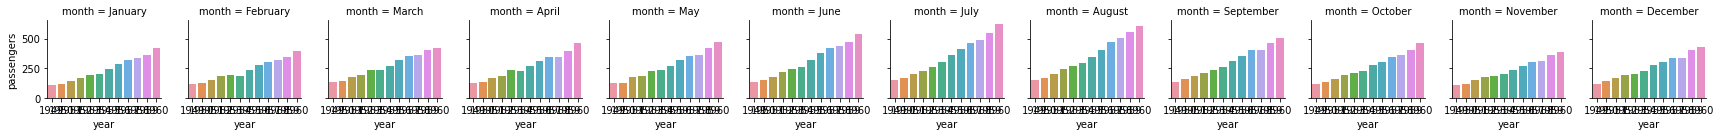

In [0]:
# Flights Pivot Table

sns.catplot(x='year', y='passengers', col='month', 
            kind='bar', data=flights, height=2);

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####